In [46]:
%matplotlib widget
import numpy as np
import math
from matplotlib import cm
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as matlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

def read_data(filename):  
    df = pd.read_csv(filename)
    df.columns = ["X1","X2","y"]
    X1=df.iloc[:,0]
    X2=df.iloc[:,1]
    y=df.iloc[:,2]
    X=np.column_stack((X1,X2))
    return X, y

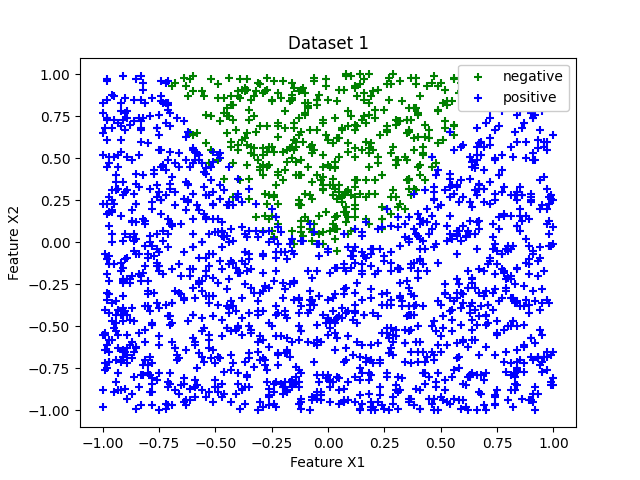

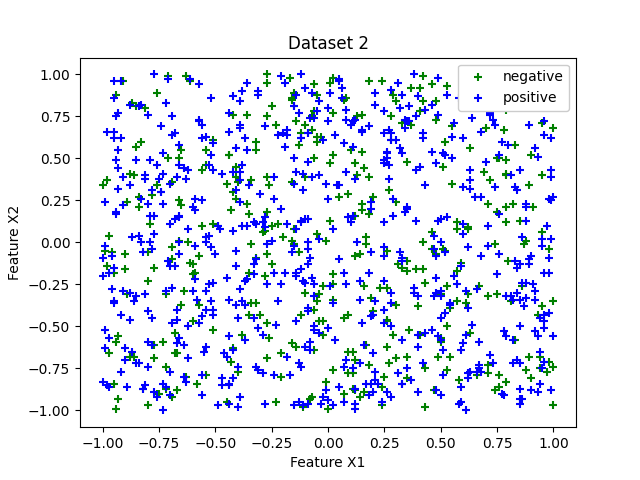

In [47]:

def plot_data(X, y, title):
    fig = plt.figure()
    plt.rc('font', size=10)
    X_m1 = X[np.where(y == -1)]
    X_p1 = X[np.where(y == 1)]
    plt.scatter(X_m1[:, 0], X_m1[:, 1], c='g', marker='+',label="negative", s=30)
    plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+',label="positive", s=30)
    plt.xlabel('Feature X1')
    plt.ylabel('Feature X2')
    plt.legend(loc = 1, framealpha = 1.0)
    plt.title(title)
    plt.show()
    
X, y = read_data("week4.csv")
plot_data(X,y,"Dataset 1")

X, y = read_data("week4_1.csv")
plot_data(X,y,"Dataset 2")

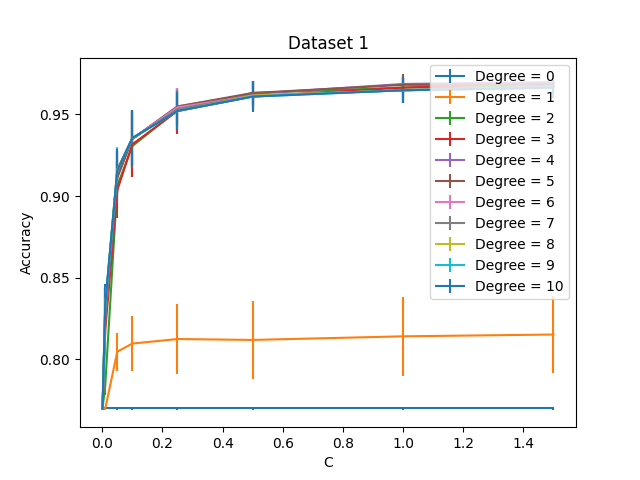

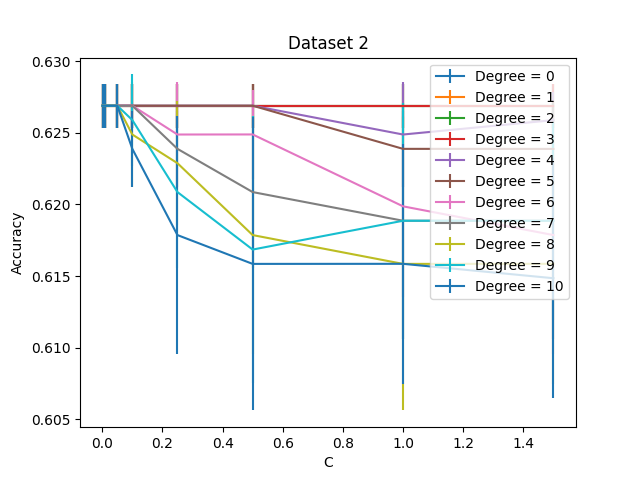

In [48]:
#i) a)
def best_poly_and_c(X, y, title):
    fig = plt.figure()
    poly_test = [0,1,2,3,4,5,6,7,8,9,10]
    Cs = [0.001,0.01,0.05,0.1,0.25,0.5,1,1.5]

    for p in poly_test:
        avg_accuracy=[]
        std_err=[]
        poly_x = PolynomialFeatures(p).fit_transform(X)

        for c in Cs:
            log_reg = LogisticRegression(C=c, max_iter=1000000)
            scores = cross_val_score(log_reg, poly_x, y,cv=5, scoring="accuracy")
            avg_accuracy.append(scores.mean())
            std_err.append(scores.std())

        plt.errorbar(Cs, avg_accuracy,  label="Degree = {0}".format(p), yerr=std_err,)
        plt.xlabel('C')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.title(title)
    plt.legend(loc = 1)
    plt.show()
    return

X, y = read_data("week4.csv")
best_poly_and_c(X,y, "Dataset 1")

X, y = read_data("week4_1.csv")
best_poly_and_c(X,y,"Dataset 2")


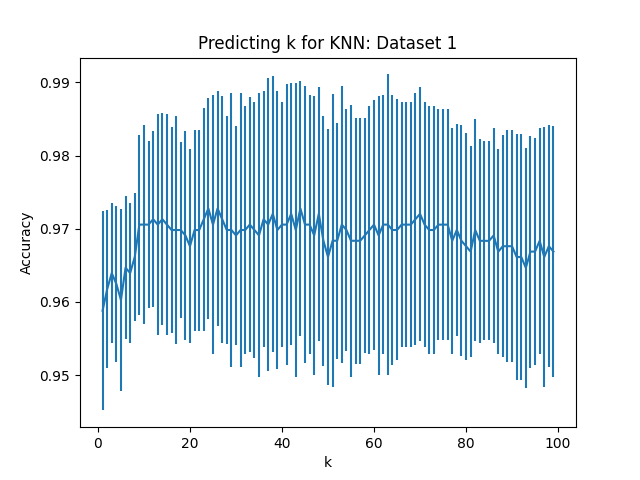

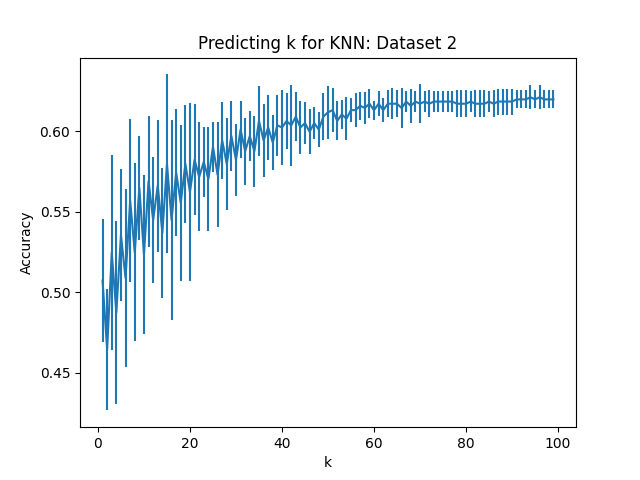

In [49]:
#i) b)
def knn(X,y,title):
    fig = plt.figure()
    x_train, x_test, y_train, y_test = train_test_split(X, y)
    avg_accuracy=[]
    std_err=[]
    k_test = np.array(range(1,100))
    for k in k_test:
        knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
        scores = cross_val_score(knn, x_train, y_train, cv=10, scoring="accuracy")
        avg_accuracy.append(scores.mean())
        std_err.append(scores.std())

    plt.errorbar(k_test, avg_accuracy, yerr=std_err)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Predicting k for KNN: ' + title)
    plt.show()
    
X, y = read_data("week4.csv")
knn(X,y, "Dataset 1")
X, y = read_data("week4_1.csv")
knn(X,y, "Dataset 2")

LogReg 
 [[101   7]
 [  4 342]]
Knn 
 [[ 93   9]
 [  7 345]]
Dummy 
 [[  0 102]
 [  0 352]]


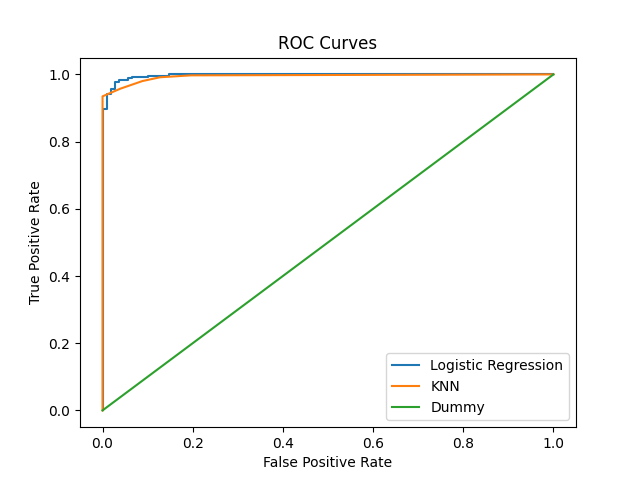

LogReg 
 [[  0  95]
 [  0 155]]
Knn 
 [[  4  81]
 [  9 156]]
Dummy 
 [[  0  85]
 [  0 165]]


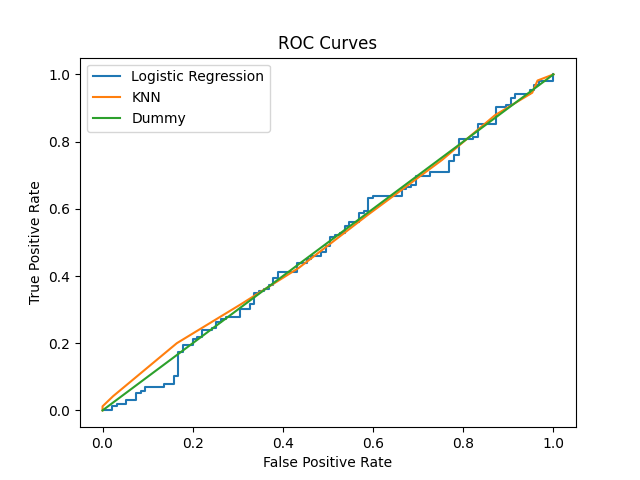

In [50]:
# i) c) & d)

def c_and_d(X, y, c, k, poly):
    fig = plt.figure()
    
    # c)
    
    y_pred_log_reg =[]; y_pred_knn = []
    x_poly = PolynomialFeatures(poly).fit_transform(X)
    x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y)
    x_train, x_test, y_train, y_test = train_test_split(X, y)

    log_reg = LogisticRegression(C=c)
    knn = KNeighborsClassifier(n_neighbors=k)
    dummy = DummyClassifier(strategy="most_frequent")

    log_reg.fit(x_poly_train, y_poly_train)
    knn.fit(x_train, y_train)
    dummy.fit(x_train, y_train)

    y_pred_log_reg = log_reg.predict(x_poly_test)
    y_pred_knn = knn.predict(x_test)
    y_pred_dummy = dummy.predict(x_test)

    log_mat = confusion_matrix(y_poly_test, y_pred_log_reg)
    knn_mat = confusion_matrix(y_test, y_pred_knn)
    dummy_mat = confusion_matrix(y_test, y_pred_dummy)
    
    print("LogReg \n", log_mat)
    print("Knn \n", knn_mat)
    print("Dummy \n", dummy_mat)

    # d)
    
    scores = log_reg.predict_proba(x_poly_test)
    fpr, tpr, _ = roc_curve(y_poly_test, scores[:, 1])
    plt.plot(fpr, tpr)

    scores = knn.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
    plt.plot(fpr, tpr)

    scores = dummy.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
    plt.plot(fpr, tpr)

    plt.title('ROC Curves')
    plt.legend(['Logistic Regression', 'KNN', 'Dummy'])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
X, y = read_data("week4.csv")
c_and_d(X,y,1,5,2)
X, y = read_data("week4_1.csv")
c_and_d(X,y,0.1,35,5)